In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df = df.rename(columns={
    'Transaction ID': 'Transaction_ID',
    'Customer ID': 'Customer_ID',
    'Product Category': 'Product_Category',
    'Price per Unit': 'Price_per_Unit',
    'Total Amount': 'Sales'
})

print(df.columns)


Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Sales'],
      dtype='object')


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

df = df.drop_duplicates()

df = df.fillna({
    'Age': df['Age'].median(),
    'Quantity': df['Quantity'].median(),
    'Price_per_Unit': df['Price_per_Unit'].median(),
    'Sales': df['Sales'].median()
})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer_ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product_Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price_per_Unit    1000 non-null   int64         
 8   Sales             1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [5]:
df[['Sales', 'Quantity', 'Price_per_Unit']].describe()


,Sales,Quantity,Price_per_Unit
count,1000.000000,1000.000000,1000.000000
mean,456.000000,2.514000,179.890000
std,559.997632,1.132734,189.681356
min,25.000000,1.000000,25.000000
25%,60.000000,1.000000,30.000000
50%,135.000000,3.000000,50.000000
75%,900.000000,4.000000,300.000000
max,2000.000000,4.000000,500.000000


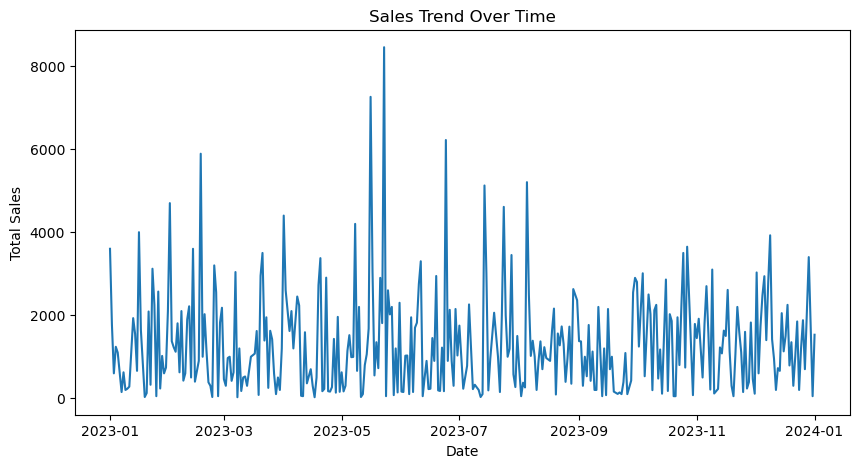

In [6]:
sales_over_time = df.groupby('Date', as_index=False)['Sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

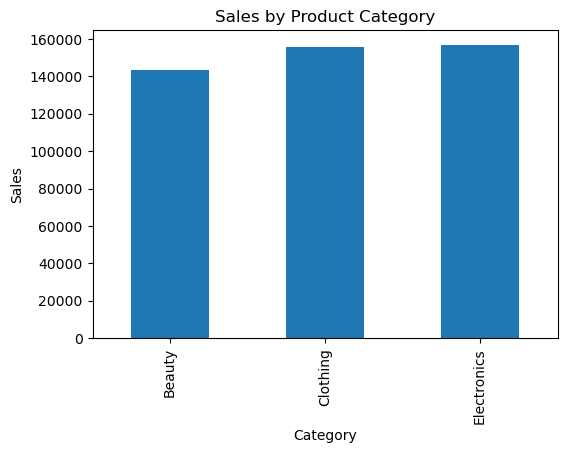

In [7]:
category_sales = df.groupby('Product_Category')['Sales'].sum()

plt.figure(figsize=(6,4))
category_sales.plot(kind='bar')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

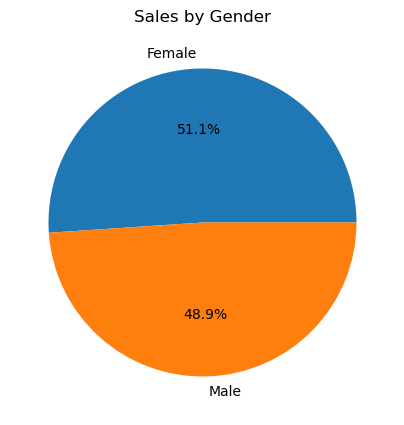

In [8]:
gender_sales = df.groupby('Gender')['Sales'].sum()

plt.figure(figsize=(5,5))
gender_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Gender")
plt.ylabel("")
plt.show()

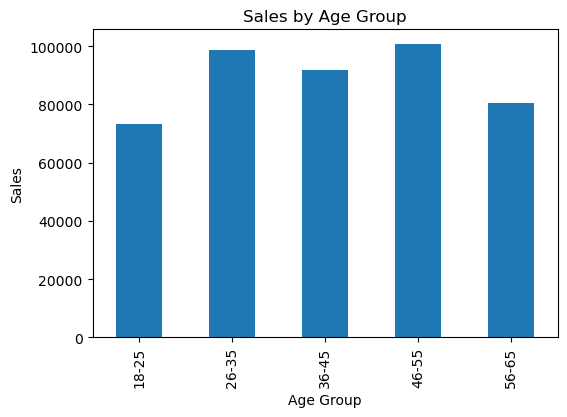

In [13]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_sales = df.groupby('Age_Group', observed=True)['Sales'].sum()

plt.figure(figsize=(6,4))
age_sales.plot(kind='bar')
plt.title("Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Sales")
plt.show()

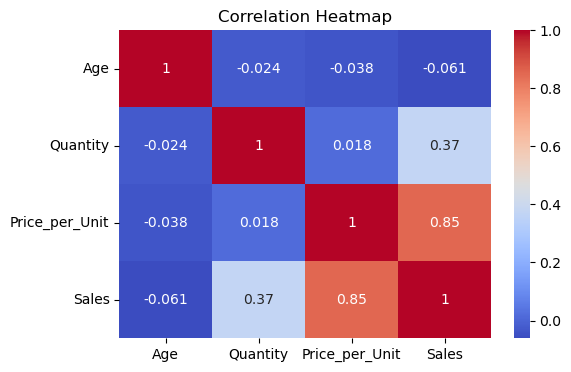

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['Age','Quantity','Price_per_Unit','Sales']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

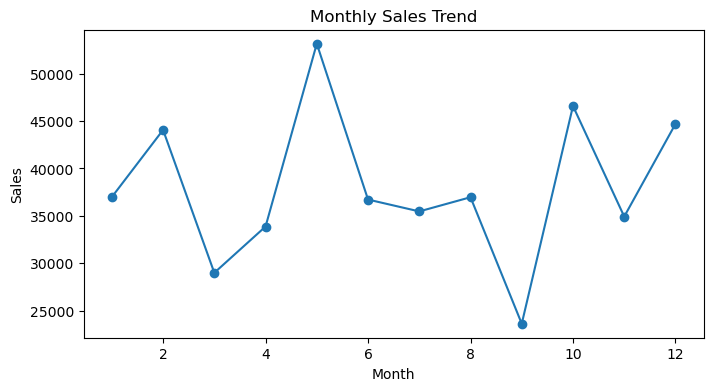

In [11]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [12]:
df.to_csv("cleaned_retail_sales_dataset.csv", index=False)